In [4]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

epoch       0.000 | loss_total     1.37503 | train_AUC    0.50269 | train_MAE    1.00264 | valid_AUC     0.49616 | valid_MAE     1.00803 | grad_wrt_mu     0.25007 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.34410 | train_AUC    0.50717 | train_MAE    0.99689 | valid_AUC     0.50111 | valid_MAE     1.00177 | grad_wrt_mu     1.08438 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.44367 | train_AUC    0.51510 | train_MAE    0.97279 | valid_AUC     0.51694 | valid_MAE     0.97556 | grad_wrt_mu     0.52100 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.15575 | train_AUC    0.53693 | train_MAE    0.96094 | valid_AUC     0.53457 | valid_MAE     0.96278 | grad_wrt_mu     0.

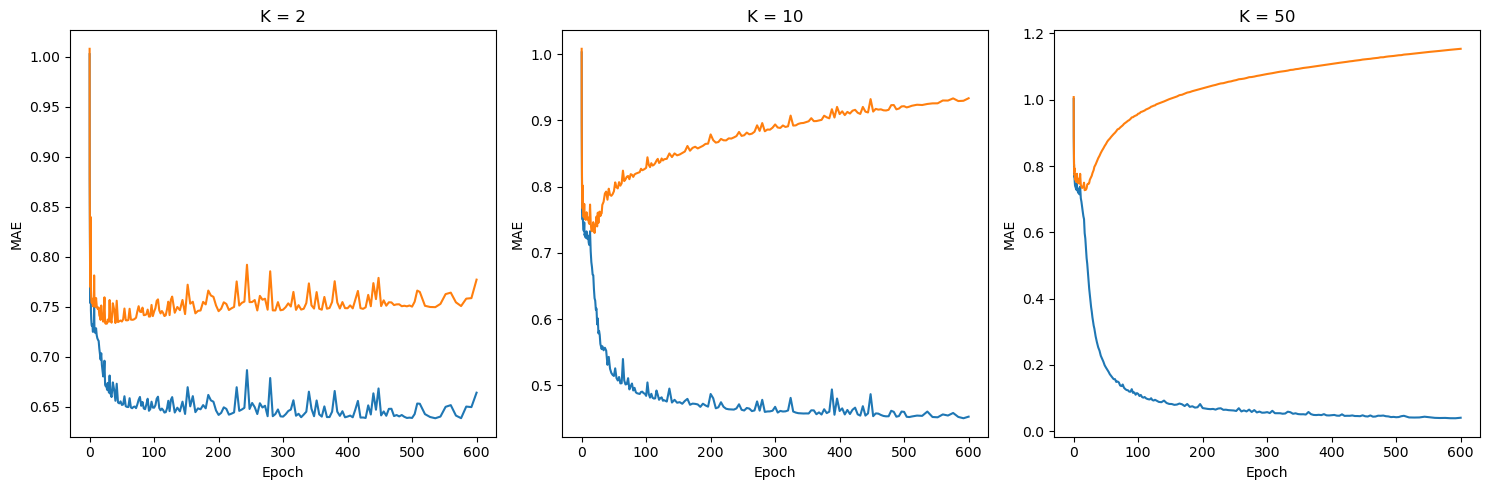

In [11]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
n_factors_list = [2, 10, 50]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(n_factors_list), figsize=(15, 5))

for i, n_factors in enumerate(n_factors_list):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=600, batch_size=32, step_size=0.2, n_factors=n_factors, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K = {n_factors}')

plt.tight_layout()
plt.show()

In [13]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = [0.0001, 0.001, 0.1]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))

for i, alpha in enumerate(alphas):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=600, batch_size=1000, step_size=0.1, n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50, alpha={alpha}')

plt.tight_layout()
plt.show()

epoch       0.000 | loss_total     1.06247 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.62456 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.68780 | train_AUC    0.51570 | train_MAE    0.98864 | valid_AUC     0.51612 | valid_MAE     0.99279 | grad_wrt_mu     0.12701 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.07202 | train_AUC    0.52747 | train_MAE    0.99120 | valid_AUC     0.53172 | valid_MAE     0.99552 | grad_wrt_mu     1.04962 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     0.96057 | train_AUC    0.53064 | train_MAE    0.96805 | valid_AUC     0.53201 | valid_MAE     0.97030 | grad_wrt_mu     0.

epoch       0.000 | loss_total     1.18728 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.62448 | grad_wrt_b_per_user     0.00199 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     0.90255 | train_AUC    0.50854 | train_MAE    0.99561 | valid_AUC     0.50535 | valid_MAE     1.00041 | grad_wrt_mu     0.49975 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     2.21428 | train_AUC    0.51756 | train_MAE    0.99001 | valid_AUC     0.51874 | valid_MAE     0.99428 | grad_wrt_mu     0.35428 | grad_wrt_b_per_user     0.00258 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.16524 | train_AUC    0.52601 | train_MAE    0.99379 | valid_AUC     0.52703 | valid_MAE     0.99835 | grad_wrt_mu     0.

/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in square
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:35: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs13

Error training as error value is overflowed
epoch       0.000 | loss_total     1.18728 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.62448 | grad_wrt_b_per_user     0.00199 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     2.72734 | train_AUC    0.50863 | train_MAE    1.29610 | valid_AUC     0.50523 | valid_MAE     1.28532 | grad_wrt_mu     2.74753 | grad_wrt_b_per_user     0.00308 | grad_wrt_c_per_item     0.00173 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total    34.35239 | train_AUC    0.51807 | train_MAE    6.28457 | valid_AUC     0.51450 | valid_MAE     6.29892 | grad_wrt_mu    11.35522 | grad_wrt_b_per_user     0.01204 | grad_wrt_c_per_item     0.00675 | grad_wrt_U     0.00009 | grad_wrt_V     0.00005
epoch       0.001 | loss_total   617.24223 | train_AUC    0.51889 | train_MAE   24.49094 | valid_AUC     0.51176 

/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in square
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:35: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs13

Error training as error value is overflowed
epoch       0.000 | loss_total     1.06247 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.62456 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.68367 | train_AUC    0.51571 | train_MAE    0.99562 | valid_AUC     0.51613 | valid_MAE     1.00040 | grad_wrt_mu     0.00093 | grad_wrt_b_per_user     0.00215 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.11305 | train_AUC    0.52628 | train_MAE    0.99551 | valid_AUC     0.52961 | valid_MAE     1.00025 | grad_wrt_mu     1.12462 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.02198 | train_AUC    0.52800 | train_MAE    0.98311 | valid_AUC     0.53024 

/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in square
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:35: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs

Error training as error value is overflowed
epoch       0.000 | loss_total     1.27349 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.73431 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.002 | loss_total     1.52480 | train_AUC    0.52969 | train_MAE    0.99445 | valid_AUC     0.53223 | valid_MAE     0.99910 | grad_wrt_mu     0.85283 | grad_wrt_b_per_user     0.00210 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.004 | loss_total     1.45685 | train_AUC    0.55714 | train_MAE    0.98493 | valid_AUC     0.55652 | valid_MAE     0.98875 | grad_wrt_mu     1.04080 | grad_wrt_b_per_user     0.00210 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.005 | loss_total     1.24391 | train_AUC    0.57841 | train_MAE    0.97331 | valid_AUC     0.58161 

/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in square
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:35: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/home/joseph280996/.conda/envs/cs135_env/lib/python3.10/

Error training as error value is overflowed
epoch       0.000 | loss_total     1.50782 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.94487 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.015 | loss_total     1.40311 | train_AUC    0.58011 | train_MAE    0.99209 | valid_AUC     0.57756 | valid_MAE     0.99657 | grad_wrt_mu     0.82789 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.029 | loss_total     1.33184 | train_AUC    0.62239 | train_MAE    0.98283 | valid_AUC     0.62131 | valid_MAE     0.98651 | grad_wrt_mu     0.65207 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.044 | loss_total     1.40311 | train_AUC    0.64881 | train_MAE    0.97551 | valid_AUC     0.64492 

IndexError: index 3 is out of bounds for axis 0 with size 3

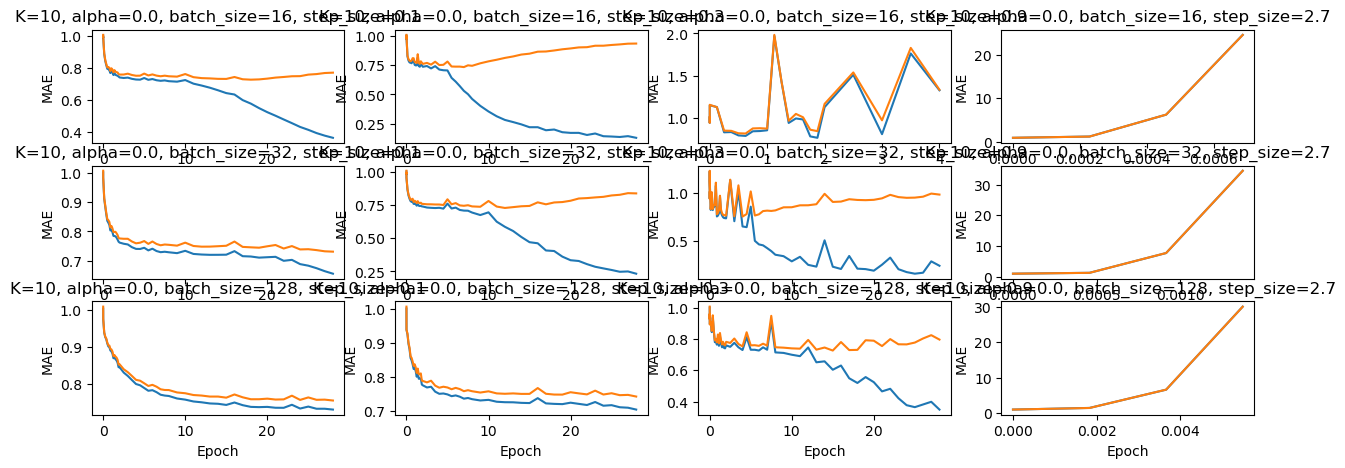

In [9]:
import itertools
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
batch_sizes = [16, 32, 128, 1016]
step_sizes = [0.01, 0.001, 0.1]

# Create subplots for the trace plots
best_maes_per_epoch = {}
fig, axs = plt.subplots(1, len(n_factors_list), figsize=(15, 5))

for batch_size, step_size in itertools.product(batch_sizes, step_sizes):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=64, batch_size=batch_size, step_size=step_size, n_factors=50, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    try:
        model.fit(train_tuple, valid_tuple)
    except ValueError:
        print("Error training as error value is overflowed")
    
    converged_mae = model.trace_mae_valid[len(model.trace_mae_train) - 1]

    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K = {n_factors}')

In [ ]:
best_combination = min(best_maes_per_epoch, key=best_maes_per_epoch.get)
best_mae = best_maes_per_epoch[best_combination]

# Train the model with the best combination and plot the MAE traces
best_batch_size, best_step_size, best_alpha = best_combination
model = CollabFilterOneVectorPerItem(
    n_epochs=64, batch_size=best_batch_size, step_size=best_step_size, n_factors=50, alpha=best_alpha
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

plt.figure(figsize=(8, 6))
plt.plot(model.trace_epoch, model.trace_mae_train, label='Training')
plt.plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title(f'Best Model: K = {n_factors}, batch_size = {best_batch_size}, step_size = {best_step_size}, alpha = {best_alpha}')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

In [ ]:
print(tr)

In [7]:
from sklearn.decomposition import PCA

user_factor = model.param_dict["U"]
item_factor = model.param_dict["V"]
print(user_factor.shape)
print(item_factor.shape)

for i, u in enumerate(user_factor):
    for j, v in enumerate(item_factor):
        plt.scatter(u[0], v[0], label=f'User {i} vs. Item {j}', c='blue', marker='o', alpha=0.5)

plt.xlabel("User Factors (PCA Dimension 1)")
plt.ylabel("Item Factors (PCA Dimension 1)")
plt.title("User Factors (U) vs. Item Factors (V)")
plt.grid(True)
plt.show()

(943, 50)
(1682, 50)


KeyboardInterrupt: 

: 

: 